# Sketchbook for galaxy plotter

Here you will find a quickly written program to handle galaxy data, from download to encode.

You will need to install mw_plot, make sure to load a proper environment and then follow the instr



In [7]:
# install git package, only run once
%pip install git+https://github.com/henrysky/milkyway_plot.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/henrysky/milkyway_plot.git to c:\users\abduj\appdata\local\temp\pip-req-build-d6rypoch
  Resolved https://github.com/henrysky/milkyway_plot.git to commit e104ced84d327c622a85775cd6305fb6521b1706
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/henrysky/milkyway_plot.git 'C:\Users\abduj\AppData\Local\Temp\pip-req-build-d6rypoch'


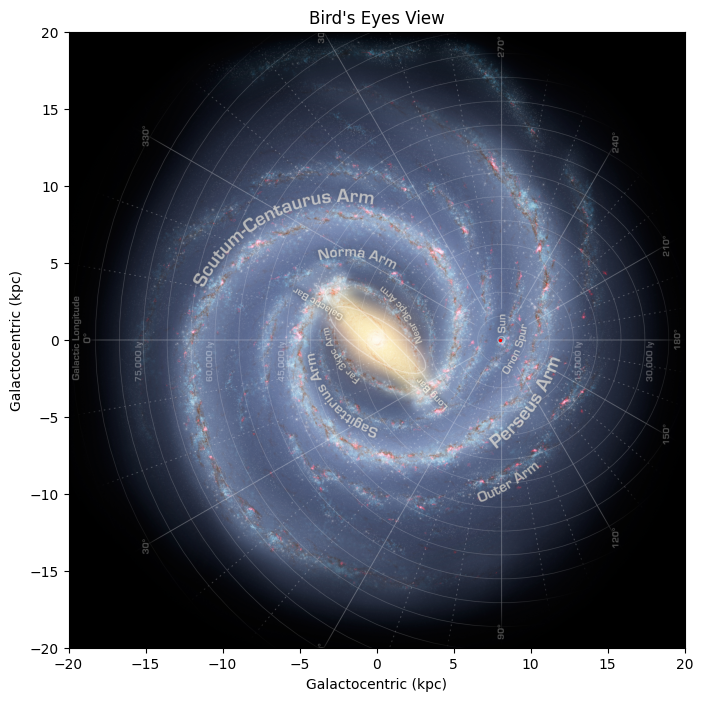

In [3]:
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn

mw1 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

mw1.title = "Bird's Eyes View"

mw1.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=2)

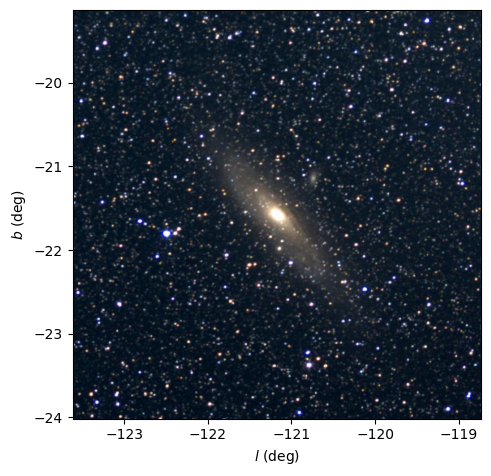

In [16]:
import matplotlib.pyplot as plt

from astropy import units as u

from mw_plot import MWSkyMap

mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))

mw1.transform(ax)

mw1.savefig('galaxy.png')

In [5]:

def plt2rgbarr(fig):
    """
    A function to transform a matplotlib to a 3d rgb np.array 

    Input
    -----
    fig: matplotlib.figure.Figure
        The plot that we want to encode.        

    Output
    ------
    np.array(ndim, ndim, 3): A 3d map of each pixel in a rgb encoding (the three dimensions are x, y, and rgb)
    
    """
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    w, h = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h, w, 4))
    return rgba_arr[:, :, :3]


In [15]:
# remove padding around the axes and generate a 2d np.array

img_array = plt2rgbarr(fig)
print(img_array.shape)  


(500, 500, 3)


In [10]:
# A grey encoding
grey = np.sum(img_array[: , : , :] * np.array([0.299, 0.587, 0.114]), axis=2)  # From RGB to grey
x, y = [], []
for ig, g in enumerate(grey):
    for ij, j in enumerate(g):
        if j > 230:
            x.append(ig)
            y.append(ij)
    

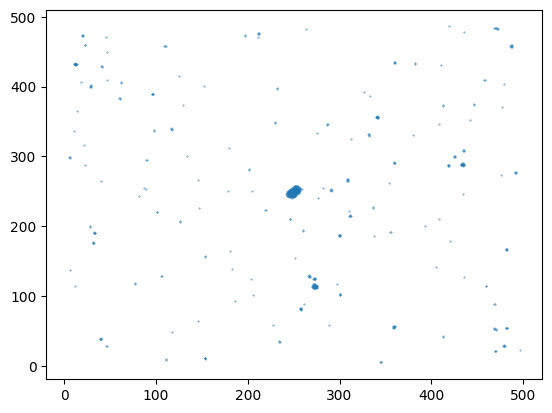

In [11]:
plt.scatter(x, y, s=0.1)

# Topic 2

## Task 0

From Project 2 Exercise 5 Task 1

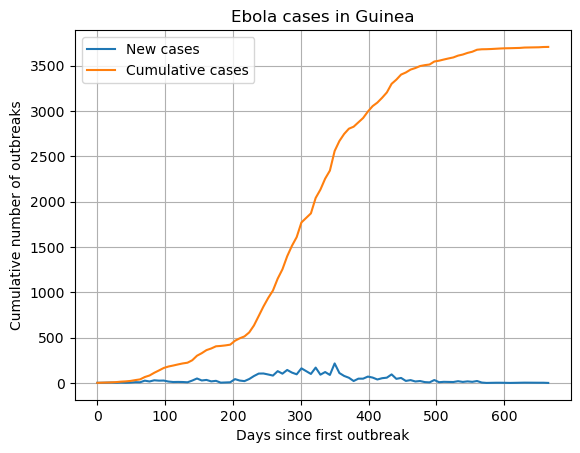

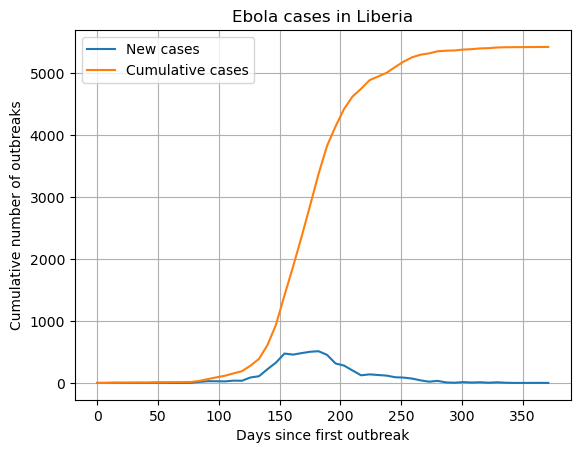

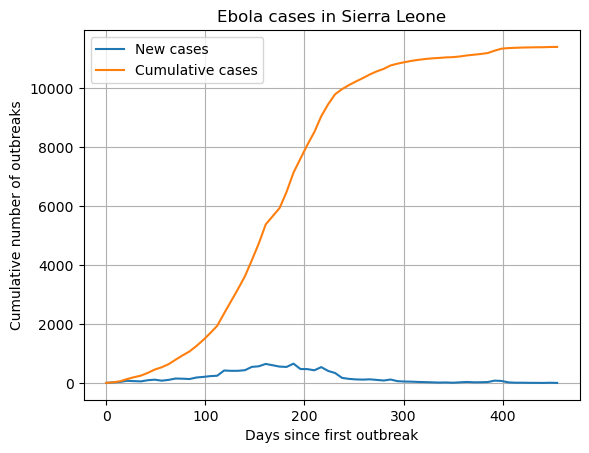

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

files = [
    ("../data/ebola_cases_guinea.dat", "Guinea"),
    ("../data/ebola_cases_liberia.dat", "Liberia"),
    ("../data/ebola_cases_sierra_leone.dat", "Sierra Leone"),
]

for file, country in files:
    data = np.loadtxt(file, skiprows=1, usecols=(1, 2))

    days = data[:, 0]
    new_cases = data[:, 1]
    cumulative_cases = np.cumsum(new_cases)

    plt.plot(days, new_cases, label="New cases")
    plt.plot(days, cumulative_cases, label="Cumulative cases")
    plt.xlabel("Days since first outbreak")
    plt.ylabel("Cumulative number of outbreaks")
    plt.title(f"Ebola cases in {country}")
    plt.legend()
    plt.grid()
    plt.show()

From Project 2 Exercise 5 Task 2

In [7]:
def f_sezr(y, gamma, sigma, t, B0, lam):
    """
    System of ODEs for SEZR model with time-dependent infection rate

    Inputs
    ------
    y : Array of [S, E, Z, R]
    gamma : Rate of recovery from zombie state
    sigma : Rate of progression from exposed to zombie state
    t : Time
    B0 : Initial infection rate
    lam : Decay constant for infection rate

    Outputs
    -------
    Array of [dS, dE, dZ, dR]
    """
    S, E, Z, R = y
    N = S + E + Z + R
    B = B0 * np.exp(-lam * t)

    dS = - B * (S * Z) / N
    dE = B * (S * Z) / N - sigma * E
    dZ = sigma * E - gamma * Z
    dR = gamma * Z
    return np.array([dS, dE, dZ, dR])

def forward_euler_sezr(t_values, gamma, sigma, S0, B0, lam, E0=0, Z0=1, R0=0):
    """
    Euler method to solve the SEZR model with time-dependent infection rate
    
    Inputs
    ------
    t_value : Array of time values
    S0 : Initial susceptible population
    E0 : Initial exposed population
    Z0 : Initial zombie population
    R0 : Initial removed population
    gamma : Rate of recovery from zombie state
    sigma : Rate of progression from exposed to zombie state
    B0 : Initial infection rate
    lam : Decay constant for infection rate

    Outputs
    -------
    y_values : Array of shape (N, 4) with S, E, Z, R values over time
    """
    y_values = np.zeros((len(t_values), 4))
    y = np.array([S0, E0, Z0, R0])
    y_values[0] = y

    for i in range(len(t_values)-1):
        dt = t_values[i+1] - t_values[i]
        y = y + dt * f_sezr(y, gamma, sigma, t_values[i], B0, lam)
        y_values[i + 1] = y
    return y_values

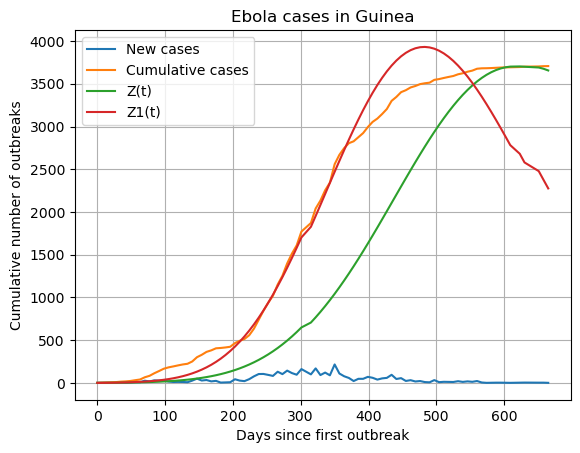

In [8]:
data = np.loadtxt("data/ebola_cases_guinea.dat", skiprows=1, usecols=(1, 2))
days = data[:, 0]
new_cases = data[:, 1]
cumulative_cases = np.cumsum(new_cases)

N = 10**7
t_values = np.arange(0, len(days))
sigma = 1/9.7
gamma = 1/7

# The real value should be between these two
y_values = forward_euler_sezr(t_values=t_values, gamma=gamma, sigma=sigma, S0=N, B0=1.264, lam=0.025)
Z_values = y_values[:, 1]
y_values1 = forward_euler_sezr(t_values=t_values, gamma=gamma, sigma=sigma, S0=N, B0=1.9, lam=0.038)
Z_values1 = y_values1[:, 1]

plt.figure(1)
plt.plot(days, new_cases, label="New cases")
plt.plot(days, cumulative_cases, label="Cumulative cases")
plt.plot(days, Z_values, label="Z(t)")
plt.plot(days, Z_values1, label="Z1(t)")
plt.xlabel("Days since first outbreak")
plt.ylabel("Cumulative number of outbreaks")
plt.title(f"Ebola cases in Guinea")
plt.legend()
plt.grid()
plt.show()

## Task 1

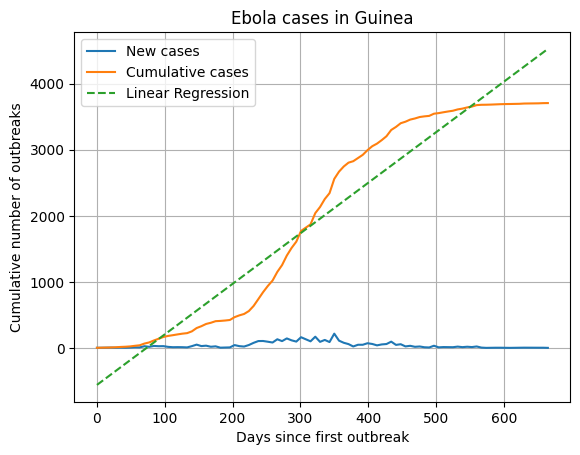

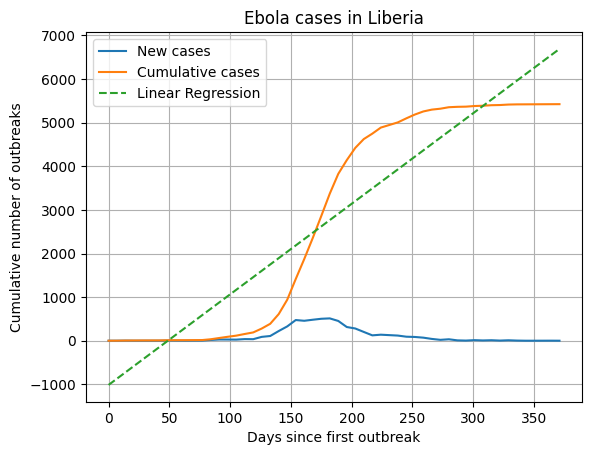

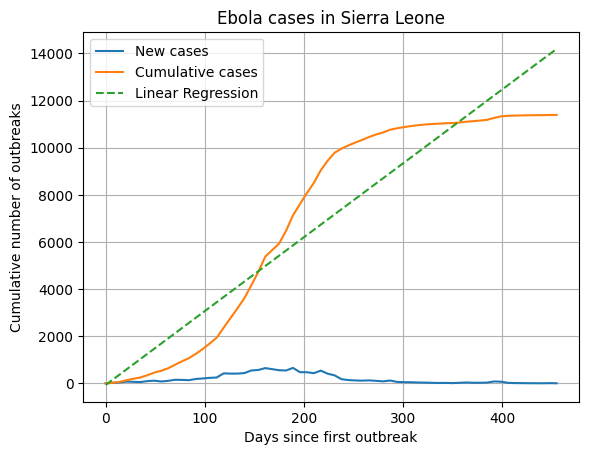

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

files = [
    ("../data/ebola_cases_guinea.dat", "Guinea"),
    ("../data/ebola_cases_liberia.dat", "Liberia"),
    ("../data/ebola_cases_sierra_leone.dat", "Sierra Leone"),
]

for file, country in files:
    data = np.loadtxt(file, skiprows=1, usecols=(1, 2))

    days = data[:, 0]
    new_cases = data[:, 1]
    cumulative_cases = np.cumsum(new_cases)

    model = LinearRegression()
    model.fit(days.reshape(-1, 1), cumulative_cases)
    pred = model.predict(days.reshape(-1, 1))

    plt.plot(days, new_cases, label="New cases")
    plt.plot(days, cumulative_cases, label="Cumulative cases")
    plt.plot(days, pred, '--', label="Linear Regression")
    plt.xlabel("Days since first outbreak")
    plt.ylabel("Cumulative number of outbreaks")
    plt.title(f"Ebola cases in {country}")
    plt.legend()
    plt.grid()
    plt.show()

## Task 2

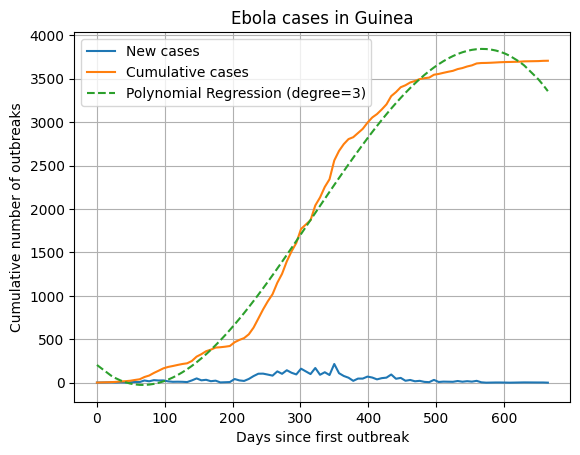

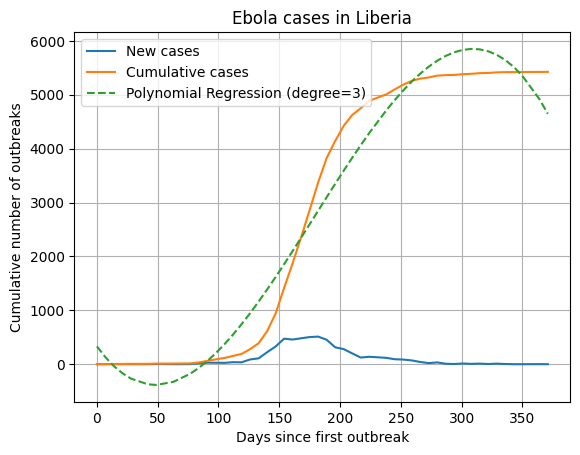

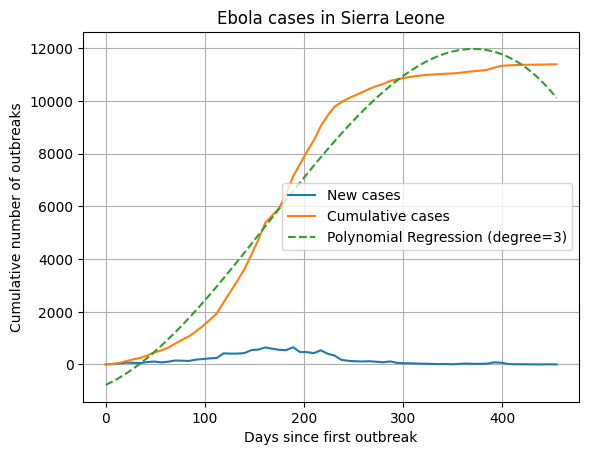

In [5]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3

for file, country in files:
    data = np.loadtxt(file, skiprows=1, usecols=(1, 2))

    days = data[:, 0]
    new_cases = data[:, 1]
    cumulative_cases = np.cumsum(new_cases)

    poly = PolynomialFeatures(degree=degree)
    days_poly = poly.fit_transform(days.reshape(-1, 1))

    model = LinearRegression()  
    model.fit(days_poly, cumulative_cases)
    pred = model.predict(days_poly)
    
    plt.plot(days, new_cases, label="New cases")
    plt.plot(days, cumulative_cases, label="Cumulative cases")
    plt.plot(days, pred, '--', label=f"Polynomial Regression (degree={degree})")
    plt.xlabel("Days since first outbreak")
    plt.ylabel("Cumulative number of outbreaks")
    plt.title(f"Ebola cases in {country}")
    plt.legend()
    plt.grid()
    plt.show()

## Task 3

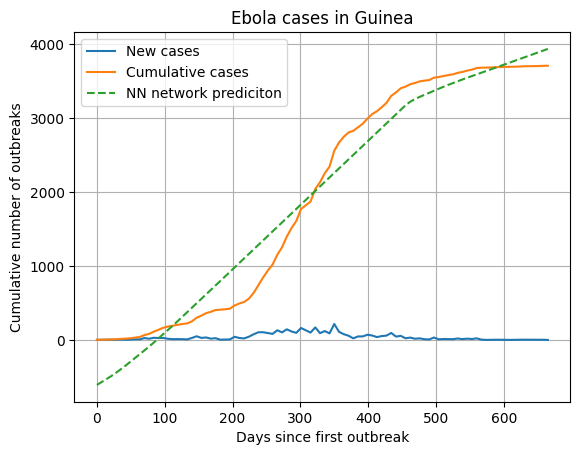

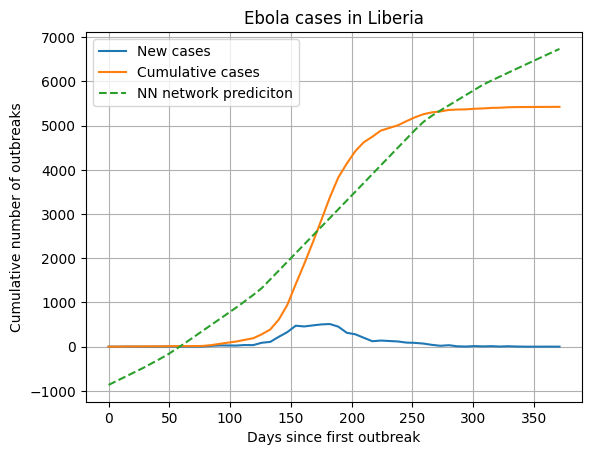

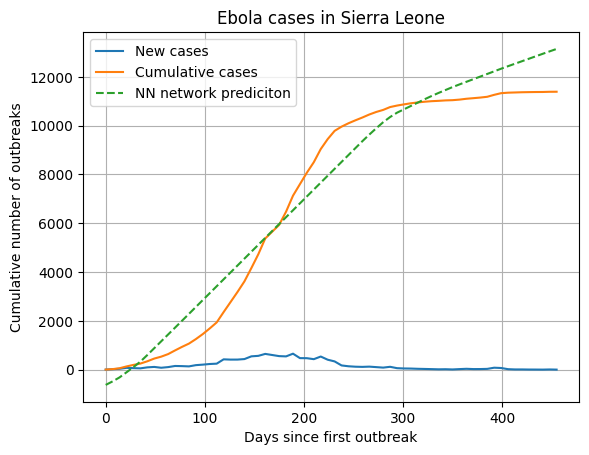

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

for file, country in files:
    data = np.loadtxt(file, skiprows=1, usecols=(1, 2))

    days = data[:, 0]
    new_cases = data[:, 1]
    cumulative_cases = np.cumsum(new_cases)

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(days.reshape(-1, 1))
    y_scaled = scaler_y.fit_transform(cumulative_cases.reshape(-1, 1))

    split_idx = int(len(days) * 0.8)
    X_train = X_scaled[:split_idx]
    y_train = y_scaled[:split_idx]

    model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000)
    model.fit(X_train, y_train.ravel())
    y_pred_scaled = model.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    plt.plot(days, new_cases, label="New cases")
    plt.plot(days, cumulative_cases, label="Cumulative cases")
    plt.plot(days, y_pred, '--', label="NN network prediciton")
    plt.xlabel("Days since first outbreak")
    plt.ylabel("Cumulative number of outbreaks")
    plt.title(f"Ebola cases in {country}")
    plt.legend()
    plt.grid()
    plt.show()

## Task 4

/home/whym/Documents/Projects/project4mod300/Mod300-project4/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


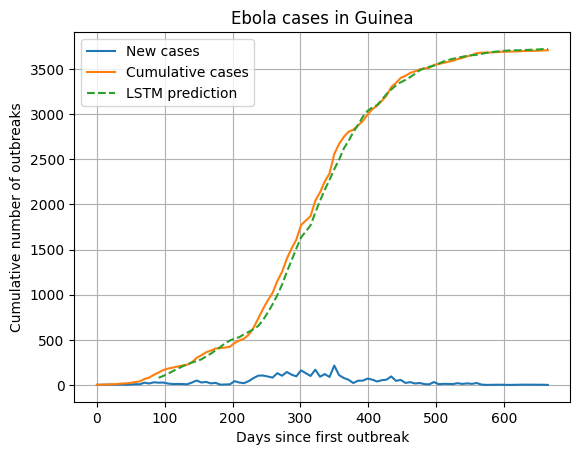

/home/whym/Documents/Projects/project4mod300/Mod300-project4/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


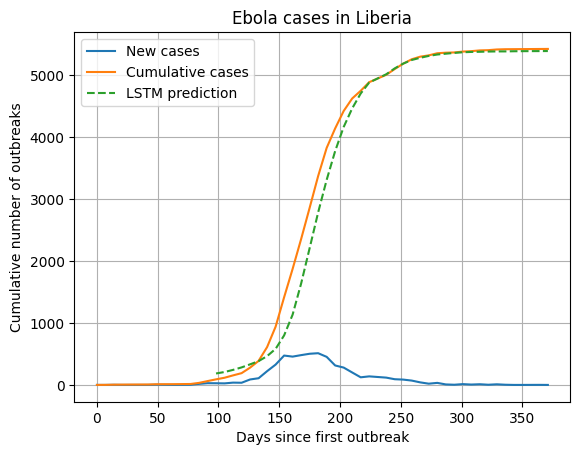

/home/whym/Documents/Projects/project4mod300/Mod300-project4/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


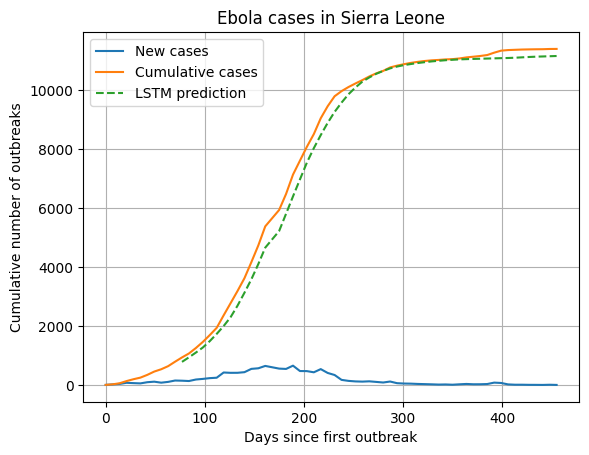

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

tf.random.set_seed(7)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		dataX.append(dataset[i:(i + look_back), 0])
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

for file, country in files:
    data = np.loadtxt(file, skiprows=1, usecols=(1, 2))
    days = data[:, 0]
    new_cases = data[:, 1]
    cumulative_cases = np.cumsum(new_cases)

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(cumulative_cases.reshape(-1, 1))

    look_back = 10
    trainX, trainY = create_dataset(scaled_data, look_back)
	
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

    split_idx = int(len(days) * 0.8)
    X_train = trainX[:split_idx]
    y_train = trainY[:split_idx]
	
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

    y_pred_scaled = model.predict(trainX)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    plt.plot(days, new_cases, label="New cases")
    plt.plot(days, cumulative_cases, label="Cumulative cases")
    plt.plot(days[look_back+1:look_back+1+len(y_pred)], y_pred, '--', label="LSTM prediction")
    plt.xlabel("Days since first outbreak")
    plt.ylabel("Cumulative number of outbreaks")
    plt.title(f"Ebola cases in {country}")
    plt.legend()
    plt.grid()
    plt.show()

## Task 5

Overall the LSTM model visually fit the data best, but needed sufficient historical data (look_back period) before making predictions. Although this can be shortened by lowering the look_back value, that would come at the cost of accuracy.  The linear regression was very inaccurate as it cant capture non linear growth. The polynomial regression was better, but had a large room for error and didnt predict the future very well. The NN network seems to not have enough data to work at its best and fell a bit short. 

A good prediction could mean predicting the toal number of cases, wheter the recovery rate will overpower the infection rate (or opposite) and identify any early warning signs. 

Even though the LSTM model was very close to our data model, machine learning has no understanding for why epidemics grow or decline. They only predict based on past patterns. The SEZR model on the other hand uses parameters like infection rate and recovery rate, which could be insightful even under different conditions. In conclusion, both approaches have use cases, but machine learning might be worse at predicting new outbreaks since there is rarely sufficient data, and ML doesn't capture interventions or changes in infection/recovery rates.


